In [3]:
from pathlib import Path
import pandas as pd
import re
import numpy as np
import json
import os

from lmfit import Model, Parameter

import matplotlib.pyplot as plt
%matplotlib notebook

from scipy import special

In [5]:
input_data_json = "/Users/j35/IPTS/SNAP/data_to_fit/spectrum_0.json"
assert os.path.exists(input_data_json)

with open(input_data_json, 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)


In [59]:
print(f"keys are: {json_object.keys()}")
xaxis = np.array(json_object['x_axis'])
yaxis = np.array(json_object['y_axis']) + 10

keys are: dict_keys(['x_axis', 'y_axis'])


# Visualize data to fit 

<IPython.core.display.Javascript object>


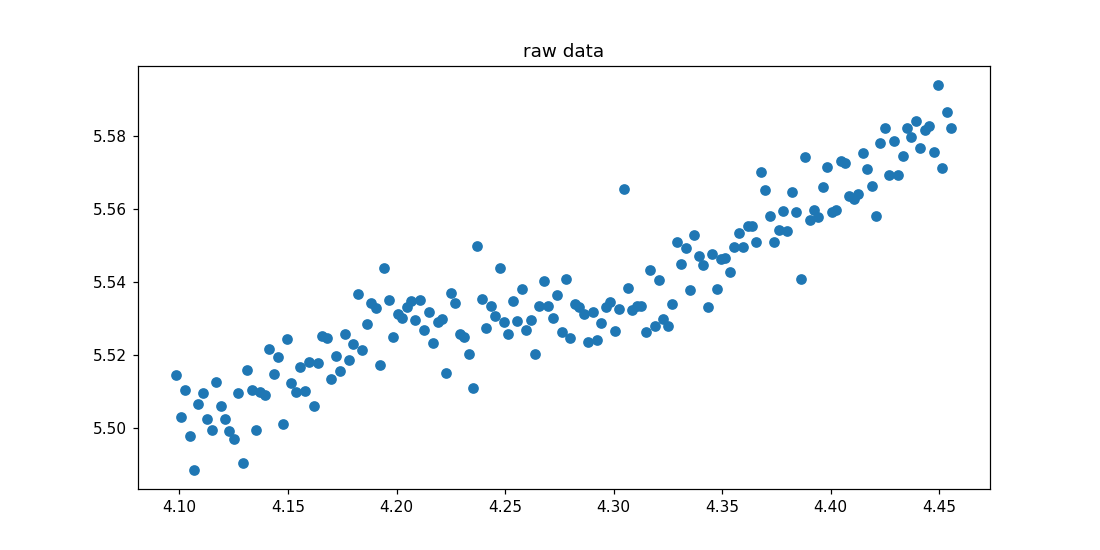

Text(0.5, 1.0, 'raw data')

In [60]:
fig, ax = plt.subplots(ncols=1, figsize=(10,5), num="raw")

#ax.scatter(x_axis, -np.log(y_axis))
ax.scatter(xaxis, yaxis)
ax.set_title("raw data")

# fitting

In [61]:
def kropff_high_lambda(lda, a0, b0):
    """Equation 7.2 found in Development and application of Bragg edge neutron transmission
    imaging on the IMAT beamline. Thesis by Ranggi Sahmura Ramadhan. June 2019
    :param
    lda (Lambda - Angstroms)
    a0 parameter to fit
    b0 parameter to fit
    """
    if (a0 == np.NaN) or (b0 == np.NaN):
        return None
    exp_expression = np.exp(-(a0 + b0 * lda))
    return exp_expression

In [62]:
gmodel = Model(kropff_high_lambda, missing='drop', independent_vars=['lda'])

In [63]:
a0 = 1
b0 = 1

In [64]:
result = gmodel.fit(yaxis, lda=xaxis, a0=a0, b0=b0)
a0_value = result.params['a0'].value
a0_error = result.params['a0'].stderr
b0_value = result.params['b0'].value
b0_error = result.params['b0'].stderr

In [65]:
yaxis_fitted = kropff_high_lambda(xaxis, a0_value, b0_value)
print(yaxis_fitted)

[5.50162552 5.5020342  5.50244692 5.50285566 5.50326444 5.50367725
 5.50408608 5.50449896 5.50490785 5.50531678 5.50572974 5.50613873
 5.50655176 5.50696081 5.50736988 5.507783   5.50819214 5.50860533
 5.50901453 5.50942376 5.50983703 5.51024632 5.51065966 5.51106901
 5.5114784  5.51189182 5.51230127 5.51271476 5.51312427 5.5135338
 5.51394738 5.51435698 5.51477063 5.51518028 5.51558997 5.51600371
 5.51641346 5.51682726 5.51723707 5.51764691 5.5180608  5.51847071
 5.51888466 5.51929462 5.51970462 5.52011866 5.52052872 5.52094283
 5.52135294 5.52176309 5.52217729 5.5225875  5.52300176 5.52341203
 5.52382233 5.52423669 5.52464705 5.52506146 5.52547189 5.52588234
 5.52629685 5.52670736 5.52712193 5.52753251 5.52794312 5.52835778
 5.52876845 5.52918317 5.5295939  5.53000466 5.53041948 5.5308303
 5.53124518 5.53165606 5.53206698 5.53248195 5.53289292 5.53330796
 5.53371899 5.53413006 5.53454519 5.53495631 5.5353715  5.53578269
 5.53619391 5.53660919 5.53702048 5.53743582 5.53784716 5.538258

# Displaying the data

<IPython.core.display.Javascript object>


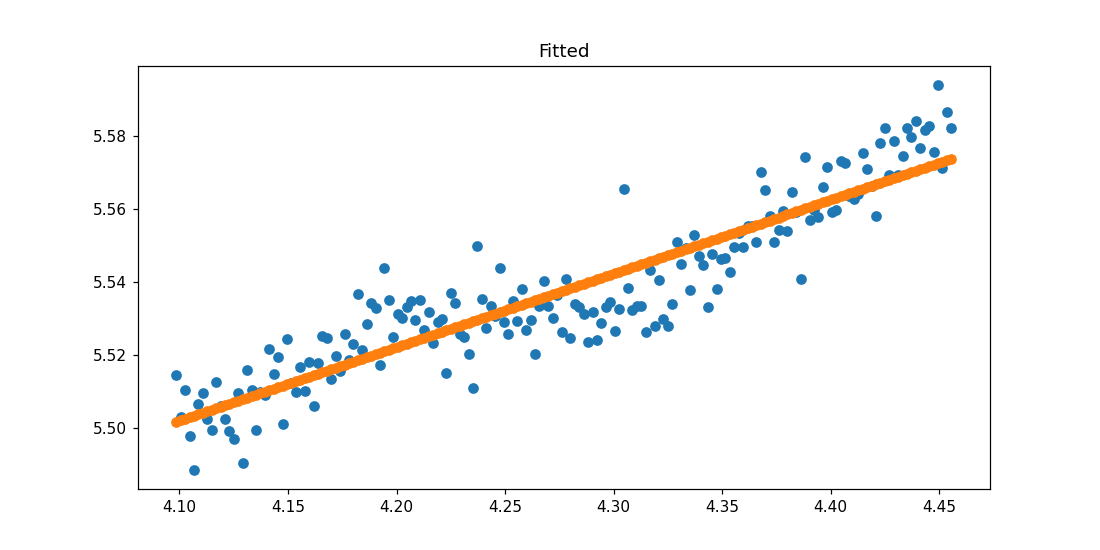

Text(0.5, 1.0, 'Fitted')

In [66]:
fig, ax = plt.subplots(ncols=1, figsize=(10,5), num="fitted")

#ax.scatter(x_axis, -np.log(y_axis))
ax.scatter(xaxis, yaxis)
ax.scatter(xaxis, yaxis_fitted)
ax.set_title("Fitted")